In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
n_itt = 30

In [4]:
OPTWIN_PATH = "" #<-- DEFINE OPTWIN PATH
RESULT_FILE1 = OPTWIN_PATH+"/MOA-Experiments/results/abrupt_binary/"
RESULT_FILE2 = "_"
RESULT_FILE3 = "_abrupt_binary"
RESULT_FILE4 = ".csv"

In [5]:
methods = []
avg_delays = []
avg_fps = []
avg_tps = []

In [6]:
save_plot = False
SAVE_PLOTS_DIR="" #set path to save plot if save_plot=True

# OPTWIN -r 0.1

In [7]:
method = "(OPTWIN-r0.1)"

In [8]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [9]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()

In [10]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [11]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [12]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [13]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.667456,4.931496e-10,1001.0,0.2,0.0,0.319551,1.0,0.0,0.0,0.8,1001.0,2856.0,1.0


In [14]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [15]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

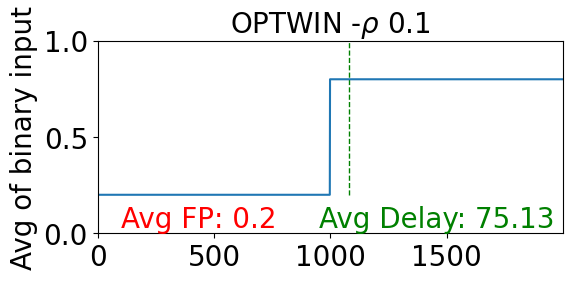

In [17]:
itt = 0
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title(r'OPTWIN -$\rho$ 0.1', fontsize = 20)
plt.ylabel('Avg of binary input') 
#plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_optwin0.1.svg", bbox_inches="tight")


# OPTWIN -r 0.5

In [18]:
method = "(OPTWIN-r0.5)"

In [19]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [20]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.002107,1.557051e-12,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,2856.0
1,2.0,0.013608,1.005429e-11,2.0,0.0,0.000000,0.100000,0.0,0.000000,0.0,0.2,2.0,2856.0
2,3.0,0.017284,1.277057e-11,3.0,0.0,0.000000,0.155556,0.0,0.000000,0.0,0.2,3.0,2856.0
3,4.0,0.019992,1.477115e-11,4.0,0.0,0.000000,0.188889,0.0,0.000000,0.0,0.2,4.0,2856.0
4,5.0,0.022526,1.664322e-11,5.0,0.0,0.000000,0.211111,0.0,0.000000,0.0,0.2,5.0,2856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.835108,6.170186e-10,1995.0,1.1,1.033333,0.322587,1.0,28.166667,1.0,0.8,1995.0,2856.0
1995,1996.0,0.835446,6.172686e-10,1996.0,1.1,1.033333,0.322585,1.0,28.166667,1.0,0.8,1996.0,2856.0
1996,1997.0,0.835779,6.175148e-10,1997.0,1.1,1.033333,0.322584,1.0,28.166667,1.0,0.8,1997.0,2856.0
1997,1998.0,0.836100,6.177516e-10,1998.0,1.1,1.033333,0.322573,1.0,28.166667,1.0,0.8,1998.0,2856.0


In [21]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [22]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [23]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [24]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.526045,3.886680e-10,1001.0,0.1,0.033333,0.320469,1.0,0.0,0.0,0.8,1001.0,2856.0,1.0


In [25]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [26]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

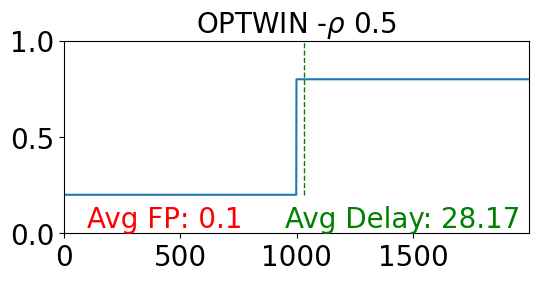

In [27]:
itt = 0
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title(r'OPTWIN -$\rho$ 0.5', fontsize = 20)
#plt.ylabel('Avg of binary input') 
#plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_optwin0.5.svg", bbox_inches="tight")


# OPTWIN -r 1.0

In [28]:
method = "(OPTWIN-r1.0)"

In [29]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [30]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.067427,4.981844e-11,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.2,1.0,2856.0
1,2.0,0.079017,5.838170e-11,2.0,0.000000,0.0,0.100000,0.0,0.000000,0.0,0.2,2.0,2856.0
2,3.0,0.082430,6.090337e-11,3.0,0.000000,0.0,0.155556,0.0,0.000000,0.0,0.2,3.0,2856.0
3,4.0,0.085431,6.312065e-11,4.0,0.000000,0.0,0.188889,0.0,0.000000,0.0,0.2,4.0,2856.0
4,5.0,0.088034,6.504395e-11,5.0,0.000000,0.0,0.211111,0.0,0.000000,0.0,0.2,5.0,2856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.871068,6.435879e-10,1995.0,1.666667,1.1,0.321207,1.0,18.333333,1.0,0.8,1995.0,2856.0
1995,1996.0,0.871394,6.438286e-10,1996.0,1.666667,1.1,0.321208,1.0,18.333333,1.0,0.8,1996.0,2856.0
1996,1997.0,0.871665,6.440287e-10,1997.0,1.666667,1.1,0.321217,1.0,18.333333,1.0,0.8,1997.0,2856.0
1997,1998.0,0.871939,6.442317e-10,1998.0,1.666667,1.1,0.321212,1.0,18.333333,1.0,0.8,1998.0,2856.0


In [31]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [32]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [33]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [34]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.579873,4.284390e-10,1001.0,0.066667,0.0,0.320501,1.0,0.0,0.0,0.8,1001.0,2856.0,1.0


In [35]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [36]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

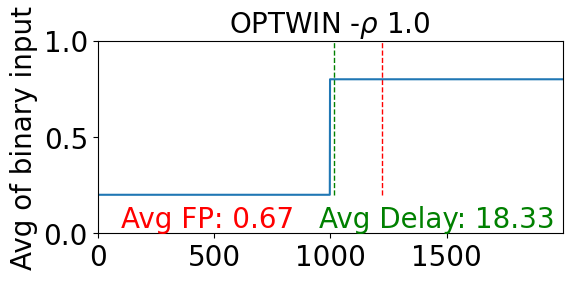

In [37]:
itt = 0
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title(r'OPTWIN -$\rho$ 1.0', fontsize = 20)
plt.ylabel('Avg of binary input') 
#plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_optwin1.0.svg", bbox_inches="tight")


# ADWIN

In [38]:
method = "ADWINChangeDetector"

In [39]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [40]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.001542,5.490040e-13,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.2,1.0,1376.0
1,2.0,0.008431,3.001344e-12,2.0,0.000000,0.0,0.100000,0.0,0.000000,0.0,0.2,2.0,1376.0
2,3.0,0.010253,3.649913e-12,3.0,0.000000,0.0,0.155556,0.0,0.000000,0.0,0.2,3.0,1376.0
3,4.0,0.011825,4.209264e-12,4.0,0.000000,0.0,0.188889,0.0,0.000000,0.0,0.2,4.0,1376.0
4,5.0,0.013264,4.721568e-12,5.0,0.000000,0.0,0.211111,0.0,0.000000,0.0,0.2,5.0,1376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.553684,3.274474e-10,1995.0,2.866667,0.0,0.339264,1.0,46.333333,1.0,0.8,1995.0,2552.0
1995,1996.0,0.553814,3.275331e-10,1996.0,2.866667,0.0,0.339255,1.0,46.333333,1.0,0.8,1996.0,2552.0
1996,1997.0,0.553944,3.276184e-10,1997.0,2.866667,0.0,0.339257,1.0,46.333333,1.0,0.8,1997.0,2552.0
1997,1998.0,0.554070,3.277020e-10,1998.0,2.866667,0.0,0.339248,1.0,46.333333,1.0,0.8,1998.0,2552.0


In [41]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [42]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [43]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [44]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.388235,2.251570e-10,1001.0,0.0,0.0,0.320413,1.0,0.0,0.0,0.8,1001.0,2552.0,1.0


In [45]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [46]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

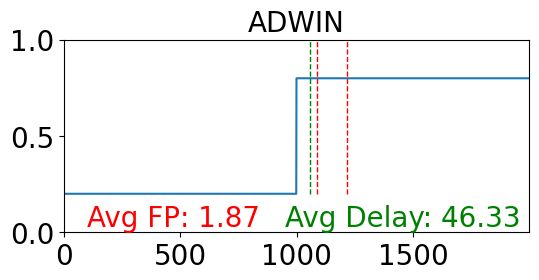

In [47]:
itt = 0
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title('ADWIN', fontsize = 20)
#plt.ylabel('Avg of binary input') 
#plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_adwin.svg", bbox_inches="tight")


# DDM

In [48]:
method = "DDM"

In [49]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [50]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.001188,4.597753e-13,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.2,1.0,1496.0
1,2.0,0.007811,3.022881e-12,2.0,0.0,0.000000,0.100000,0.0,0.0,0.0,0.2,2.0,1496.0
2,3.0,0.009932,3.843781e-12,3.0,0.0,0.000000,0.155556,0.0,0.0,0.0,0.2,3.0,1496.0
3,4.0,0.011765,4.553234e-12,4.0,0.0,0.000000,0.188889,0.0,0.0,0.0,0.2,4.0,1496.0
4,5.0,0.013446,5.203756e-12,5.0,0.0,0.000000,0.211111,0.0,0.0,0.0,0.2,5.0,1496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.509006,1.969935e-10,1995.0,1.2,1.066667,0.329156,1.0,64.5,1.0,0.8,1995.0,1496.0
1995,1996.0,0.509153,1.970506e-10,1996.0,1.2,1.066667,0.329150,1.0,64.5,1.0,0.8,1996.0,1496.0
1996,1997.0,0.509290,1.971033e-10,1997.0,1.2,1.066667,0.329156,1.0,64.5,1.0,0.8,1997.0,1496.0
1997,1998.0,0.509435,1.971595e-10,1998.0,1.2,1.066667,0.329149,1.0,64.5,1.0,0.8,1998.0,1496.0


In [51]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [52]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [53]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [54]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.348892,1.350269e-10,1001.0,0.2,0.266667,0.319803,1.0,0.0,0.0,0.8,1001.0,1496.0,1.0


In [55]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [56]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

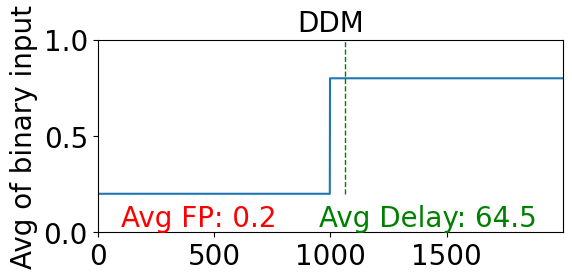

In [57]:
itt = 0
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title(method, fontsize = 20)
plt.ylabel('Avg of binary input') 
#plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_ddm.svg", bbox_inches="tight")


# EDDM

In [58]:
method = "EDDM"

In [59]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [60]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.001176,3.042924e-13,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,1000.0
1,2.0,0.007220,1.867923e-12,2.0,0.000000,0.000000,0.100000,0.0,0.000000,0.0,0.2,2.0,1000.0
2,3.0,0.008741,2.261268e-12,3.0,0.000000,0.000000,0.244444,0.0,0.000000,0.0,0.2,3.0,1000.0
3,4.0,0.010053,2.600632e-12,4.0,0.000000,0.000000,0.420833,0.0,0.000000,0.0,0.2,4.0,1000.0
4,5.0,0.011271,2.915842e-12,5.0,0.000000,0.000000,0.613333,0.0,0.000000,0.0,0.2,5.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.418931,1.083776e-10,1995.0,7.566667,0.566667,2.585607,1.0,26.766667,1.0,0.8,1995.0,1000.0
1995,1996.0,0.419039,1.084057e-10,1996.0,7.566667,0.566667,2.584537,1.0,26.766667,1.0,0.8,1996.0,1000.0
1996,1997.0,0.419145,1.084330e-10,1997.0,7.566667,0.566667,2.583485,1.0,26.766667,1.0,0.8,1997.0,1000.0
1997,1998.0,0.419257,1.084621e-10,1998.0,7.566667,0.566667,2.582417,1.0,26.766667,1.0,0.8,1998.0,1000.0


In [61]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [62]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [63]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [64]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.283708,7.339551e-11,1001.0,3.466667,0.166667,4.635316,1.0,0.0,0.0,0.8,1001.0,1000.0,1.0


In [65]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [66]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

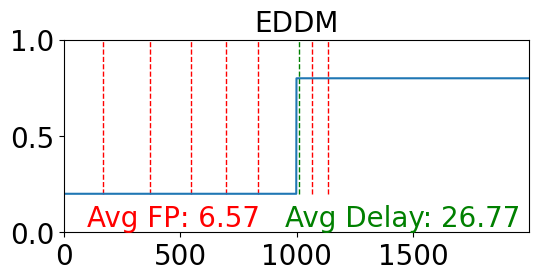

In [67]:
itt = 24
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title(method, fontsize = 20)
#plt.ylabel('Avg of binary input') 
#plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_eddm.svg", bbox_inches="tight")


# STEPD

In [68]:
method = "STEPD"

In [69]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [70]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.001199,4.986897e-13,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,1.0,1608.0
1,2.0,0.008171,3.398949e-12,2.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.2,2.0,1608.0
2,3.0,0.010341,4.301691e-12,3.0,0.0,0.0,0.133333,0.0,0.0,0.0,0.2,3.0,1608.0
3,4.0,0.012210,5.079289e-12,4.0,0.0,0.0,0.150000,0.0,0.0,0.0,0.2,4.0,1608.0
4,5.0,0.013935,5.796873e-12,5.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.2,5.0,1608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.540506,2.248454e-10,1995.0,1.4,1.0,0.500284,1.0,13.0,1.0,0.8,1995.0,1608.0
1995,1996.0,0.540641,2.249018e-10,1996.0,1.4,1.0,0.500434,1.0,13.0,1.0,0.8,1996.0,1608.0
1996,1997.0,0.540785,2.249615e-10,1997.0,1.4,1.0,0.500568,1.0,13.0,1.0,0.8,1997.0,1608.0
1997,1998.0,0.540930,2.250221e-10,1998.0,1.4,1.0,0.500717,1.0,13.0,1.0,0.8,1998.0,1608.0


In [71]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [72]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [73]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [74]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.370089,1.539535e-10,1001.0,0.2,0.033333,0.200932,1.0,0.0,0.0,0.8,1001.0,1608.0,1.0


In [75]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [76]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

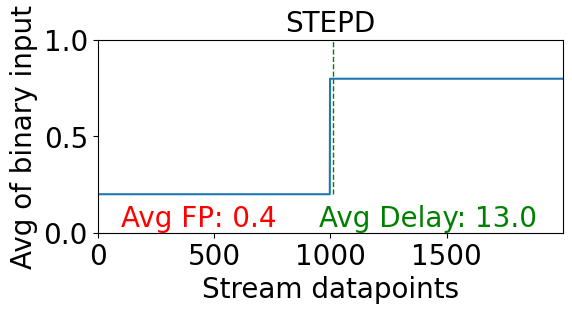

In [77]:
itt = 0
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title(method, fontsize = 20)
plt.ylabel('Avg of binary input') 
plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))

drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_stepd.svg", bbox_inches="tight")


# EWMAChartDM

In [78]:
method = "EWMAChartDM"

In [79]:
drift_detection = []
for i in range(1,n_itt+1):
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2+str(i)+RESULT_FILE3+RESULT_FILE4
    drift_detection.append(pd.read_csv(RESULT_FILE).head(1999))

In [80]:
#get average from n_itt runs
drift_detection_concat =  pd.concat(drift_detection)
drift_detection_concat['delay detection (average)'] = drift_detection_concat['delay detection (average)'].replace('?',0.0).astype('float64')
drift_detection_avg = drift_detection_concat.groupby(drift_detection_concat.index).mean(numeric_only=True)
drift_detection_std = drift_detection_concat.groupby(drift_detection_concat.index).std()
drift_detection_avg

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes)
0,1.0,0.001152,3.884761e-13,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.2,1.0,1304.0
1,2.0,0.006838,2.306793e-12,2.0,0.000000,0.0,0.100000,0.0,0.000000,0.000000,0.2,2.0,1304.0
2,3.0,0.008458,2.853405e-12,3.0,0.000000,0.0,0.155556,0.0,0.000000,0.000000,0.2,3.0,1304.0
3,4.0,0.009993,3.370972e-12,4.0,0.000000,0.0,0.188889,0.0,0.000000,0.000000,0.2,4.0,1304.0
4,5.0,0.011589,3.909410e-12,5.0,0.000000,0.0,0.211111,0.0,0.000000,0.000000,0.2,5.0,1304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995.0,0.492639,1.661896e-10,1995.0,3.633333,1.1,0.319302,1.0,5.466667,0.966667,0.8,1995.0,1304.0
1995,1996.0,0.492759,1.662301e-10,1996.0,3.633333,1.1,0.319301,1.0,5.466667,0.966667,0.8,1996.0,1304.0
1996,1997.0,0.492876,1.662697e-10,1997.0,3.633333,1.1,0.319312,1.0,5.466667,0.966667,0.8,1997.0,1304.0
1997,1998.0,0.492994,1.663094e-10,1998.0,3.633333,1.1,0.319311,1.0,5.466667,0.966667,0.8,1998.0,1304.0


In [81]:
#Avg Delay
avg_delay = drift_detection_avg['delay detection (average)'][drift_detection_avg.shape[0]-1]

In [82]:
#Avg true positives
avg_tp = drift_detection_avg['true changes detected'][drift_detection_avg.shape[0]-1]

In [83]:
#Avg false negatives
avg_drifts = drift_detection_avg['detected changes'][drift_detection_avg.shape[0]-1]
avg_fp = avg_drifts - avg_tp

In [84]:
# Real Drifts
drift_detection_avg['drift'] = drift_detection_avg['true changes'].diff()
drift_detection_avg['drift'][0] = 0.0
drift_detection_avg['drift'] = drift_detection_avg['drift'].shift(periods=1)
drift_detection_avg['drift'][0] = 0.0
df_filtered = drift_detection_avg[drift_detection_avg['drift'] != 0]
df_filtered

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),learned instances,detected changes,detected warnings,prediction error (average),true changes,delay detection (average),true changes detected,input values,model training instances,model serialized size (bytes),drift
1000,1001.0,0.334856,1.129623e-10,1001.0,2.666667,0.433333,0.318367,1.0,0.0,0.0,0.8,1001.0,1304.0,1.0


In [85]:
#Drifts
real_drifts = []
false_drifts = []
for i in range(n_itt):  
    drift_detection[i]['drift_detected'] = drift_detection[i]['detected changes'].diff()
    drift_detection[i]['drift_detected'][0] = 0.0
    drift_detection[i]['drift_detected'] = drift_detection[i]['drift_detected'].shift(periods=1)
    drift_detection[i]['drift_detected'][0] = 0.0
    all_drifts = drift_detection[i][drift_detection[i]['drift_detected'] != 0].index
    
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['true changes detected'].diff()
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    drift_detection[i]['drift_detected_correclty'] = drift_detection[i]['drift_detected_correclty'].shift(periods=1)
    drift_detection[i]['drift_detected_correclty'][0] = 0.0
    true_drifts = drift_detection[i][drift_detection[i]['drift_detected_correclty'] != 0].index
    real_drifts.append(true_drifts)
    
    f_drifts = [x for x in all_drifts if x not in true_drifts]
    #if len(f_drifts) > 0:    
    false_drifts.append(f_drifts)

In [86]:
methods.append(method)
avg_delays.append(avg_delay)
avg_fps.append(avg_fp)
avg_tps.append(avg_tp)

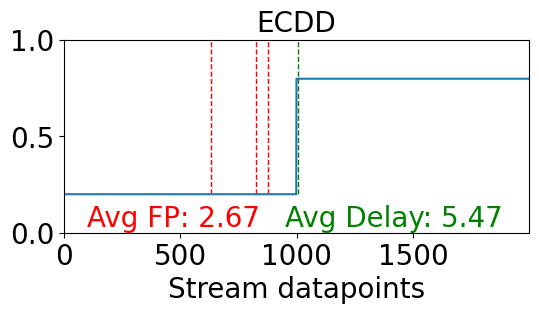

In [87]:
itt = 2
plt.figure(figsize=(6,2.5))
plt.rcParams.update({'font.size': 20})
plt.title('ECDD', fontsize = 20)
#plt.ylabel('Avg of binary input') 
plt.xlabel('Stream datapoints') 
for l in real_drifts[itt]:
    plt.vlines(l, 0.2, 1, colors = "green", linewidth=1, linestyles = "dashed")
    #plt.text(l+100, 1, str(l), c = "black", fontsize = 10)
if len(false_drifts) > 0:
    for f in false_drifts[itt]:
        plt.vlines(f, 0.2, 1, colors = "red", linewidth=1, linestyles = "dashed")
        #plt.text(f+100, 1, "error", c = "red", fontsize = 10)
fp = [len(i) for i in false_drifts]
if len(fp) > 0:
    fp = sum(fp)/len(fp)
else:
    fp = 0
plt.text(100, 0.03, "Avg FP: " + str(round(avg_fp,2)), c = "red", fontsize = 20)
plt.text(950, 0.03, "Avg Delay: " + str(round(avg_delay,2)), c = "green", fontsize = 20)
#plt.text(1500, 0.065, "Avg TP: " + str(round(avg_tp,2)), c = "black", fontsize = 10)

x1,x2,y1,y2 = plt.axis()
plt.axis((0,1999,0,1))
drift_detection_avg['input values'].plot()
if save_plot:
    plt.savefig(SAVE_PLOTS_DIR+"abr_b_ecdd.svg", bbox_inches="tight")



In [88]:
methods

['(OPTWIN-r0.1)',
 '(OPTWIN-r0.5)',
 '(OPTWIN-r1.0)',
 'ADWINChangeDetector',
 'DDM',
 'EDDM',
 'STEPD',
 'EWMAChartDM']

In [89]:
avg_delays

[75.13333333333334,
 28.166666666666668,
 18.333333333333332,
 46.333333333333336,
 64.5,
 26.766666666666666,
 13.0,
 5.466666666666667]

In [90]:
avg_fps

[0.19999999999999996,
 0.10000000000000009,
 0.6666666666666667,
 1.8666666666666667,
 0.19999999999999996,
 6.566666666666666,
 0.3999999999999999,
 2.6666666666666665]

In [91]:
avg_tps

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667]